In [1]:

import numpy as np
import tensorflow as tf
print(tf.__version__)
from wgomoku import GomokuBoard, Heuristics
from wgomoku.GomokuData import create_sample

2.8.0


In [2]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK=0
WHITE=1
EDGES=2

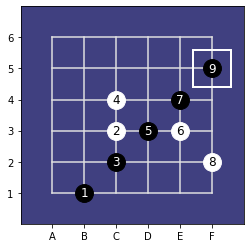

In [3]:
heuristics = Heuristics(kappa=3.0)
board = GomokuBoard(heuristics, n=6, disp_width=4)
board.set(B, 1).set(C, 3).set(C, 2).set(C, 4).set(D, 3).set(E, 3).set(E, 4).set(F, 2).set(F, 5).\
    display()

In [4]:
board.stones

[(2, 1), (3, 3), (3, 2), (3, 4), (4, 3), (5, 3), (5, 4), (6, 2), (6, 5)]

In [34]:
np_sample = create_sample(board.stones, 6, BLACK, borders=False)
np_sample

array([[[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 1]],

       [[0, 0],
        [0, 0],
        [1, 0],
        [0, 0],
        [0, 1],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 1],
        [0, 0],
        [0, 0],
        [1, 0]],

       [[0, 0],
        [0, 1],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

In [35]:
np_sample.shape

(6, 6, 2)

In [36]:
empty=np.zeros([5,5], dtype=float)
diag=np.eye(5, dtype=float)
filters = np.array([empty, diag[::-1]])
filters = np.rollaxis(filters, 0, 3)
print(filters.shape)
filters

(5, 5, 2)


array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [37]:
kernel_init = tf.constant_initializer(filters)
bias_init = tf.constant_initializer(-4.)

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(5, 5),
                           kernel_initializer=kernel_init, bias_initializer=bias_init,
                           activation=tf.nn.relu, input_shape=(6,6,2,)),
])

In [39]:
the_sample = np.reshape(np_sample, [-1, 6, 6, 2])

In [40]:
model(the_sample)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[0.],
         [0.]],

        [[0.],
         [1.]]]], dtype=float32)>